# Homework 2 - Steam Reviews 2021

### Libraries

In [2]:
import pandas as pd
import numpy as np
from functions import *
import imp

%matplotlib inline
import matplotlib.pyplot as plt

import datetime as dt
import time

from scipy.stats import chi2_contingency, ttest_ind ,chisquare, kruskal, pearsonr

In [3]:
dataset = load_csv()

## [RQ1] Exploratory Data Analysis

Let's first review the file.
Our dataset is a collection of over 21 milion reviews of around 300 different games on the gaming platform Steam.

In [4]:
dataset.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


In [5]:
dataset.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

We can find information about the language the review was written in, the time it was created (and when it was updated), information about the author and his activity on the platform and more else.

## [RQ2] Information about the games

First of all, we want to analyze which games are the most reviewed and which games were the most recommended.We used the **Pandas** built-in function *value_counts* to do a bar plot of the 10 most reviewed games, in descending order.
These are the results:

<AxesSubplot:title={'center':'Reviews amount for each App'}, xlabel='Application name', ylabel='Number of Reviews'>

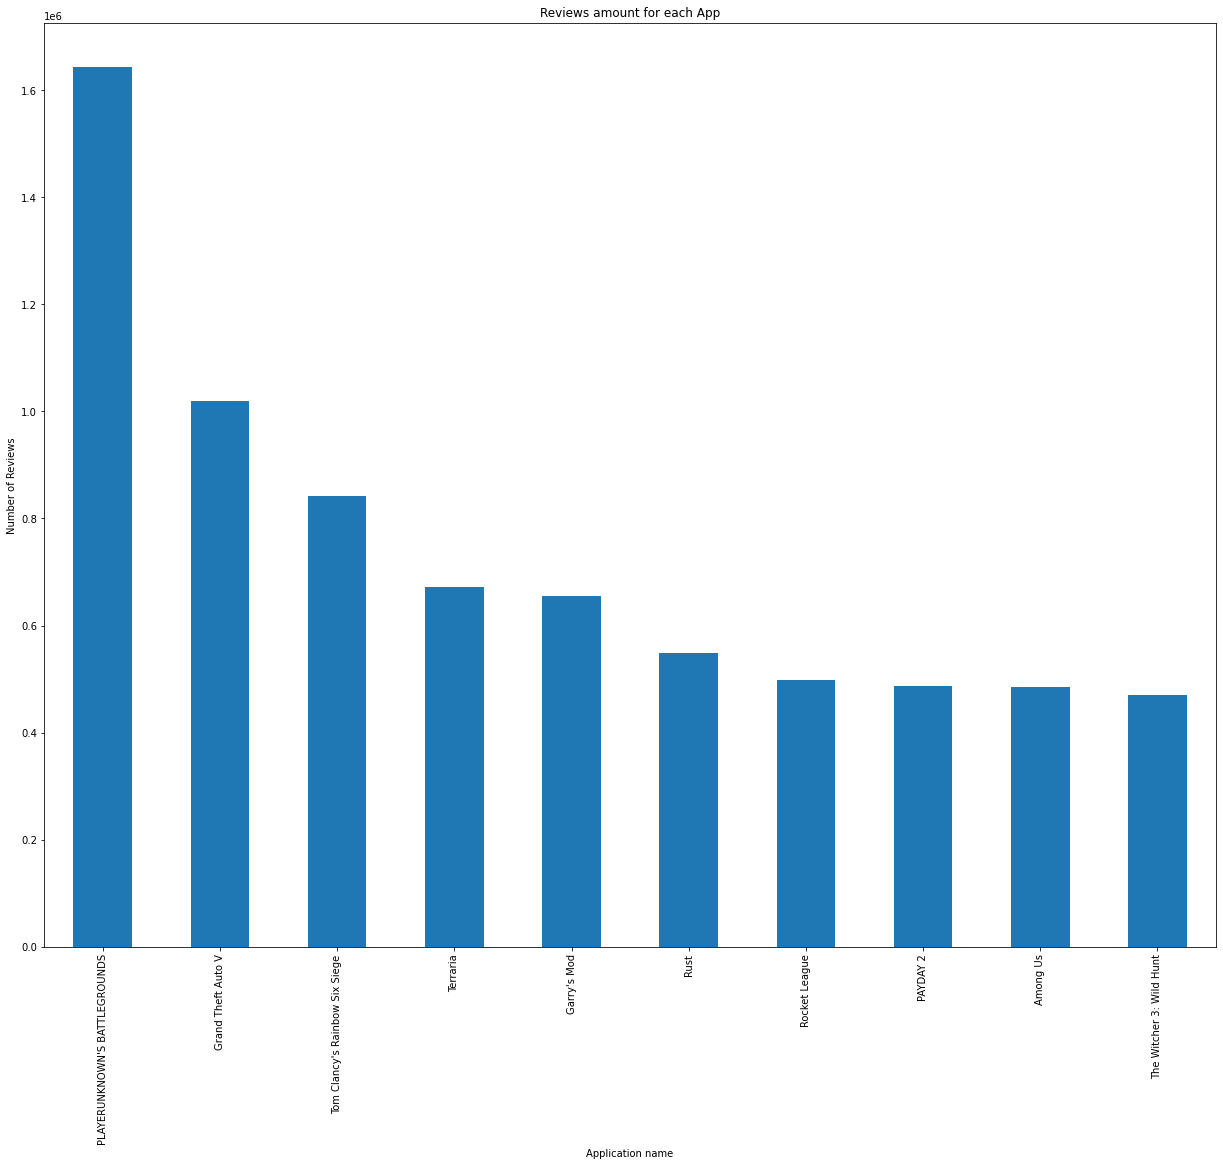

In [6]:
dataset['app_name'].value_counts()[:10].plot.bar(figsize = (21,17), title="Reviews amount for each App", 
                                                 xlabel = 'Application name', ylabel = 'Number of Reviews')

| **Game Name** | **Rank** |
|-------------------------------|-----|
| PLAYERUNKNOWN'S BATTLEGROUNDS | 1 |
| Greand Theft Auto V | 2 |
|Tom Clancy's Rainbow Six Siege | 3 |
|Terraria | 4 |
|Garry's Mod | 5 |
|Rust | 6 |
|Rocket Leaugue | 7 |
|PAYDAY 2 | 8 |
|Among Us | 9 |
|The Witcher 3: Wild Hunt|10|


Let's now see which application has the best *Weighted Vote Score* (WVS). Since every review has a different WVS we decided to do a *groupby* method to separate the dataset by the name of the application, and then find the mean value, for each game, of the WVS. With this method we found out that the game with the highest WVS was **Hunt Down The Freeman**

In [7]:
dataset.groupby('app_name')['weighted_vote_score'].mean().idxmax()

'Hunt Down The Freeman'

Let's now search for the most and the least recommended games on steam. Since the *recommended* column contains boolean values, we can sum all the elements to obtain the number of True's, and then find the entries which received most and least recommendation.

In [8]:
dataset.groupby('app_name').recommended.sum().nlargest(5)

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
Name: recommended, dtype: int64

The top 5 recommended games on Steam are:

| **Game Name** |**Number of Recommendation**|
|-------------------------------|-----|
| PLAYERUNKNOWN'S BATTLEGROUNDS | 886417 |
| Grand Theft Auto V | 831311 |
|Tom Clancy's Rainbow Six Siege | 742397 |
|Terraria | 658741 |
|Garry's Mod | 632558|


In [9]:
dataset.groupby('app_name').recommended.sum().nsmallest(5)

app_name
Neon Hardcorps                  89
DRAGON QUEST HEROES™ II        423
Identity                       439
Shadow Complex Remastered      587
Out of the Park Baseball 19    594
Name: recommended, dtype: int64

The top 5 least recommended games on Steam are:

| **Game Name** |**Number of Recommendation**|
|-------------------------------|-----|
| Neon Hardcorps|89 |
| DRAGON QUEST HEROES™ II | 423 |
|Identity | 439 |
|Shadow Complex Remastered | 587 |
|Out of the Park Baseball 19 | 594|


Let's now focus on the most recommended game and the least recommended game and check how many reviewers puchased these games or received them for free.

False    1582812
True       61443
Name: received_for_free, dtype: int64

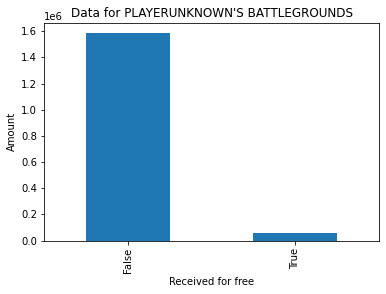

In [10]:
dataset[dataset['app_name']=="PLAYERUNKNOWN'S BATTLEGROUNDS"]['received_for_free'].value_counts().plot.bar(xlabel = 'Received for free',
                                                                                                          ylabel = 'Amount',
                                                                                                          title = "Data for PLAYERUNKNOWN'S BATTLEGROUNDS")
dataset[dataset['app_name']=="PLAYERUNKNOWN'S BATTLEGROUNDS"]['received_for_free'].value_counts()

In the case of **PLAYERUNKNOWN'S BATTLEGROUNDS** we can see that 1,582,812 reviewers purchased the game, whether on Steam or on a 3rd party platform and 61,443 reviewers received it for free.

False    173
True      27
Name: received_for_free, dtype: int64

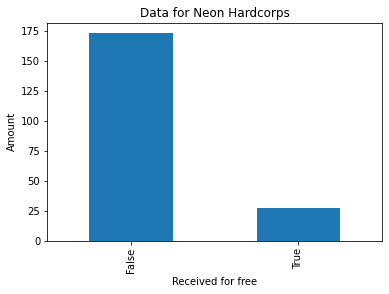

In [15]:
dataset[dataset['app_name']=="Neon Hardcorps"]['received_for_free'].value_counts().plot.bar(xlabel = 'Received for free',
                                                                                            ylabel = 'Amount',
                                                                                            title = "Data for Neon Hardcorps")
dataset[dataset['app_name']=="Neon Hardcorps"]['received_for_free'].value_counts()

In the case of **Neon Hardcorps** we can see that 173 reviewers purchased the game, whether on Steam or on a 3rd party platform and 27 reviewers received it for free.

## [RQ3]Information about the time of the reviews

We are now interested in understanding the preferred time to do reviews.
Let's first see what is the most common time for the authors to write a review; to do this we took the *hour* and the minute *value* from the **timestamp_created** and then did a *plot bar* of the 15 most frequent entries. These are the results:

<AxesSubplot:xlabel='Time of Reviews', ylabel='Amount of Reviews'>

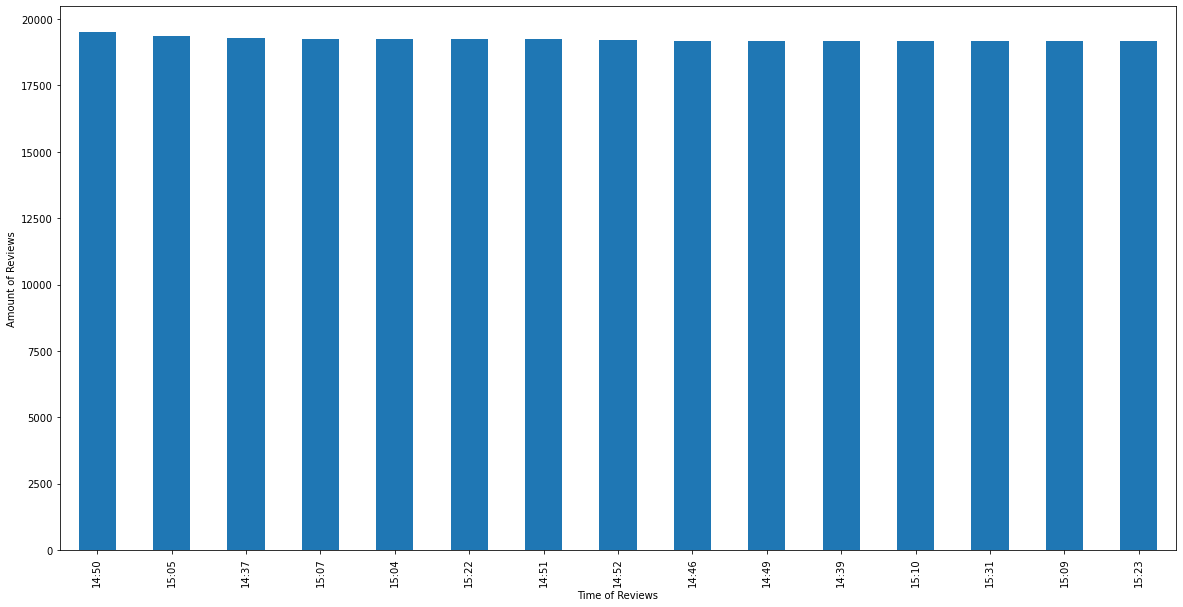

In [17]:
dataset['timestamp_created'].dt.strftime('%H:%M').value_counts()[:15].plot.bar(figsize = (20,10),
                                                                              xlabel = 'Time of Reviews',
                                                                              ylabel = 'Amount of Reviews')

The most common time is **14:50**, but as we can see, all the most common times are in the early afternoon. So let's analyze this thing better by checking time intervals instead of single minutes.
These are the time intervals we are going to check:

| **Initial Time** | **Final Time** |
|--------|--------|
|06:00:00|10:59:59|
|11:00:00|13:59:59|
|14:00:00|16:59:59|
|17:00:00|19:59:59|
|20:00:00|23:59:59|
|00:00:00|02:59:59|
|03:00:00|05:59:59|

In [43]:
time_intervals = [dt.datetime.strptime('06:00:00', '%H:%M:%S')]

In [44]:
dataset.groupby(pd.cut(dataset['timestamp_created'].dt.strftime('%H:%M:%S'), time_intervals)).count()
    

TypeError: float() argument must be a string or a number, not 'datetime.datetime'

## [RQ4] Information about the languages

Let's now analyze the languages the reviews are written in.
First of all we checked the most frequent languages, doing a *value_counts* and then plotting it in a *bar plot*.
This is what we obtained:



<AxesSubplot:title={'center':'Data of languages'}, xlabel='Languages', ylabel='Amount of Reviews'>

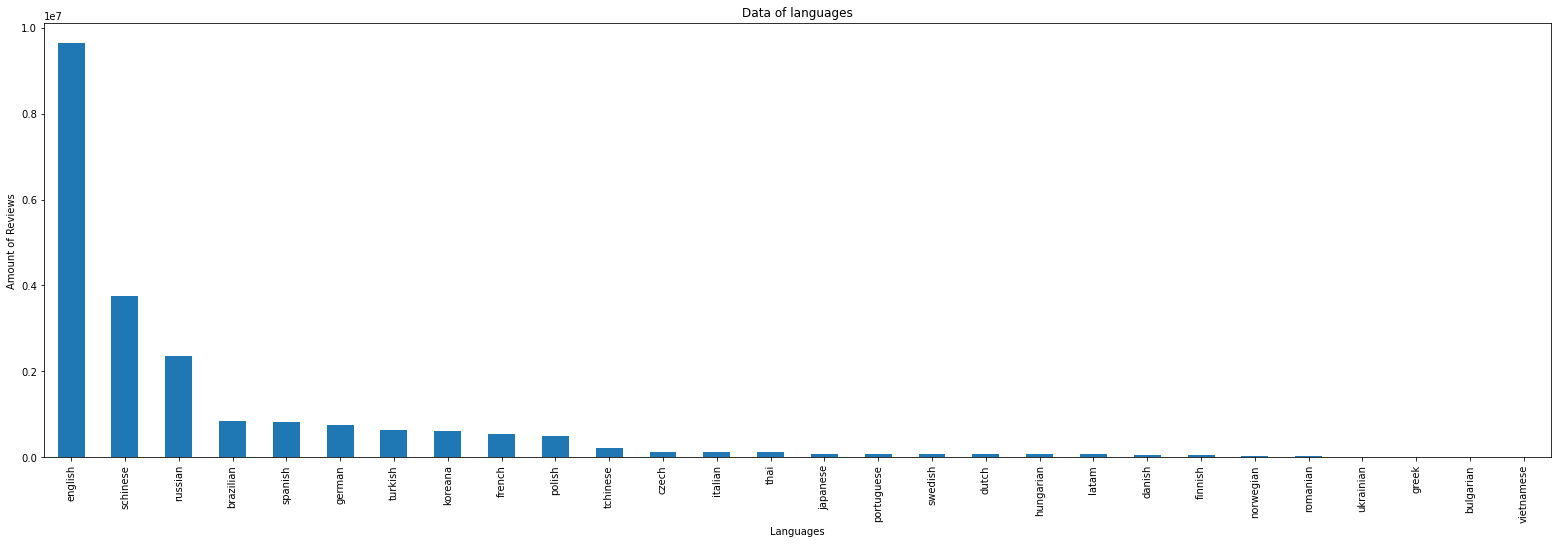

In [18]:
dataset['language'].value_counts().plot.bar(figsize = (27,8), title = 'Data of languages',
                                            xlabel = 'Languages', 
                                            ylabel = 'Amount of Reviews')

We can see that the 3 most used languages are **english**, **semplified chinese** and **russian**. Let's now focus on the reviews written in these languages. We created a new dataset using our custom function *filter_by_language*, that takes as input the dataset and a list on languages in the form of a vector and returns the filtered dataset.

In [19]:
language_list = ['english', 'russian', 'schinese']
filt_ds = filter_by_language(dataset,language_list)

Let's now see how many of the reviews of this new dataset were voted as **funny** or **helpful**. To do this we used a custom function that counts how many reviews have at least one vote in each category and then calculate the percentage by simply doing a ratio between this found number and the total amount of the reviews.
For the percentage of **funny** votes this is what we obtained:

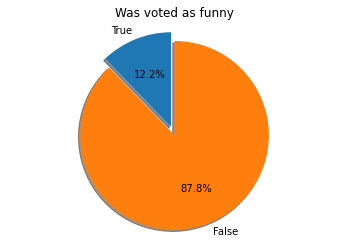

In [59]:
perc = functions.funny_percentage(filt_ds)
plot_percentage(perc, 'Was voted as funny')

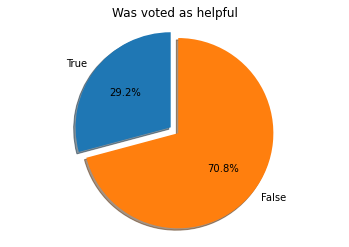

In [54]:
plot_percentage(helpful_percentage(filt_ds), 'Was voted as helpful')

## [RQ5] Information about the reviewers

Next up, we are going to get information about who write these reviews. First of all let's see who are the top 10 most popular
reviewers, where, for most popular, we intend the people who wrote more reviews.

<AxesSubplot:title={'center':'Most Popular Reviewers'}, xlabel='Author SteamId', ylabel='Amount of Written Reviews'>

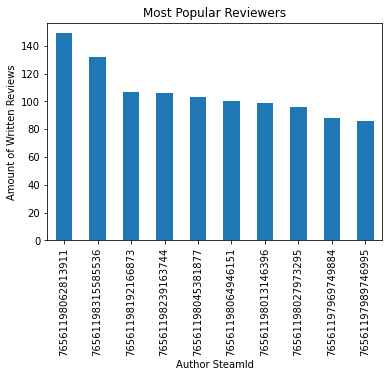

In [61]:
dataset['author.steamid'].value_counts()[:10].plot.bar(title = 'Most Popular Reviewers',
                                                      xlabel = 'Author SteamId',
                                                      ylabel = 'Amount of Written Reviews')

Here each reviewer is represented by the *SteamId*. This is a unique code which identifies the Steam profile and it cannot be changed once the account has been created. 
We are now going to focus on the most popular author and get some information about his profile. Let's start by getting his SteamId and taking the rows of the dataset which *steamid* entry corrispond to his:

In [62]:
dataset['author.steamid'].value_counts().idxmax()

76561198062813911

In [63]:
most_popular_reviewer = dataset[dataset['author.steamid'] == 76561198062813911]

Now that we got this new dataset, let's see which application did this person review:

In [64]:
most_popular_reviewer['app_name'].to_numpy()

array(['Half-Life', 'Counter-Strike: Source', 'Half-Life 2: Episode Two',
       'Portal 2', "Garry's Mod", "Sid Meier's Civilization V",
       'Dead by Daylight', "Sid Meier's Civilization VI", 'Subnautica',
       'Human: Fall Flat', 'Banished', 'Celeste',
       'Getting Over It with Bennett Foddy', 'A Hat in Time',
       'The Forest', 'Axiom Verge', 'The Binding of Isaac: Rebirth',
       'To the Moon', 'Cave Story+', 'Titan Souls', 'Super Meat Boy',
       "Don't Escape: 4 Days to Survive", 'Volgarr the Viking',
       'Enter the Gungeon', 'Salt and Sanctuary', 'Hollow Knight',
       'The End Is Nigh', 'Factorio', 'RimWorld', 'Insurgency: Sandstorm',
       'Euro Truck Simulator 2', 'Foundation', 'Kenshi',
       'Into the Breach', 'Warhammer: Vermintide 2', 'DOOM Eternal',
       'Age of Empires: Definitive Edition', 'Void Bastards',
       'Stardew Valley', 'Among Us', 'Blackwake', 'Little Nightmares',
       'Bomber Crew', 'Rust', 'HITMAN™ 2', 'Phasmophobia',
       'Mount &

We now want to check how many of these applications were purchased on steam and how many were received for free (It is important to notice that these two events are not complementary since a person can buy a game on a 3rd party platform so both entries can be *False*):

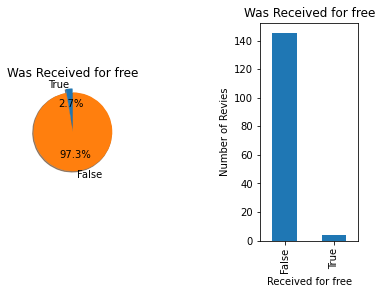

In [88]:
plot_and_count(most_popular_reviewer,received_for_free_percentage(most_popular_reviewer), 'received_for_free',
              my_title = 'Was Received for free', xlabel = 'Received for free')


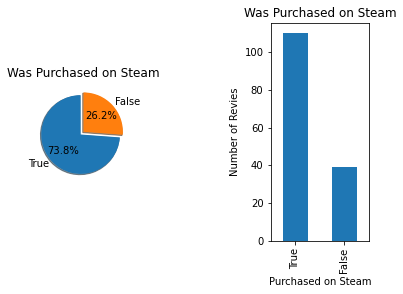

In [89]:
plot_and_count(most_popular_reviewer,steam_purchase_percentage(most_popular_reviewer), 'steam_purchase',
              my_title = 'Was Purchased on Steam', xlabel = 'Purchased on Steam')

Let's give a look, for each of these categories, how many games did he recommend. To see this, just like before, we filtered the dataset by focusing on the reviews that matched our demands, and did a simple *value_counts* to count the number of recommended games. These are the results:

In [92]:
most_popular_reviewer[most_popular_reviewer['steam_purchase'] == True].recommended.value_counts()

True     108
False      2
Name: recommended, dtype: int64

In [93]:
most_popular_reviewer[most_popular_reviewer['received_for_free'] == True].recommended.value_counts()

True    4
Name: recommended, dtype: int64

**Steam Purchased Games**

|Recommendend  |Amount|
|------------|--------|
|True | 108|
|False | 2 |

**Received for Free Games**

|Recommendend  |Amount|
|------------|--------|
|True | 4|
|False | 0 |

## [RQ6] Information about the updates

We now want to obtain information about authors who update their reviews. To do this we filtered the dataset with the rows which have different values in the **timestamp_created** and **timestamp_updated** columns (this means that the review was actually updated after some time). Then we want to calculate the average amount time an author lets pass before he updates his review. To do this we simply calculated the mean on a vector that contains the time difference between the **timestamp_created** and **timestamp_updated** columns of this new dataset.

In [95]:
dataset_with_updates = dataset[dataset['timestamp_updated'] != dataset['timestamp_created']]
(dataset_with_updates['timestamp_updated'] -dataset_with_updates['timestamp_created']).mean()

We obtain that the average time is **321 days and 46 minutes**.
Another information we may want to have is to find the authors which updates their reviews more often. To do this we simply did a *value_counts* on the new dataset and plotted the first 3. Here are the results:

<AxesSubplot:title={'center':'Authors Which Updates Their Reviews'}, xlabel='Author SteamId', ylabel='Number of Updated Reviews'>

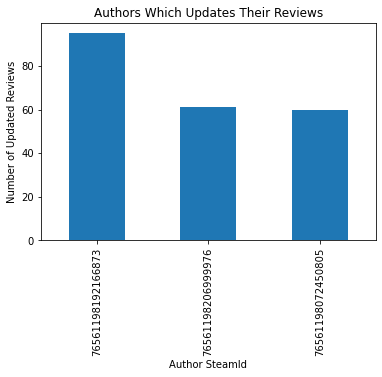

In [99]:
dataset_with_updates['author.steamid'].value_counts()[:3].plot.bar(title = 'Authors Which Updates Their Reviews',
                                                                  xlabel = 'Author SteamId',
                                                                  ylabel = 'Number of Updated Reviews')

## [RQ7] Calculating some probabilities

Let's calculate some interesting figures with our dataset.
First of all let's calculate the probability that a review has a **Weighted Vote Score** bigger than 0.5. To do this, given the amount of data we have, we can use the *Law of Big Numbers* and simply calculate the ratio between the reviews that have a *Weighted Vote Score* bigger than 0.5 and the total number of reviews. Here is the result:

In [103]:
print(weighted_vote_score_percentage(dataset))

0.21354034011743306


Now let's calculate the probability that a review has at least one vote as funny given that it has a *Weighted Vote Score* bigger than 0.5. To do this we filtered the dataset by only taking the rows that had a *Weighted Vote Score* bigger than 0.5 and use the *funny_percentage* custom function we used before on this new dataset. Here is the result:

In [106]:
print(funny_vote_given_score(dataset))

0.24978288914523247


Timedelta('321 days 00:46:24.845186976')

We know want to know if the events:

**A** = {the review has at least one vote as funny}

**B** = {the review has a weighted vote score >= 0.5}

are independent.
To do this we used the definition of conditional probability and checked if 
P(**A** | **B**) = P(**A**)   by calculating the difference between the two values and look if it is close to zero.

In [109]:
print(funny_vote_given_score(dataset) - funny_percentage(dataset))

0.13008694980617397


As we can see their difference is not even close to zero so we can conclude that the two events are not independent.

## [RQ8] Statistical Tests and Analysis

In [66]:
russian_data = dataset[dataset['language'] == 'russian']
schinese_data= dataset[dataset['language'] == 'schinese']

In [67]:
vector_a = russian_data[russian_data['weighted_vote_score']!=0]['weighted_vote_score'].to_numpy()
vector_b = schinese_data[schinese_data['weighted_vote_score']!=0]['weighted_vote_score'].to_numpy()

In [29]:
print(vector_a)
print(vector_b)

[0.52380955 0.52380955 0.52380955 ... 0.54732507 0.79892051 0.51815742]
[0.52380955 0.78422624 0.40145987 ... 0.33523822 0.50624514 0.41610676]


In [68]:
ttest_ind(vector_a,vector_b)

Ttest_indResult(statistic=-103.25727519235977, pvalue=0.0)

<ipython-input-45-62c8c677efb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['language'] = language_map(data2['language'])


In [31]:
dataset[dataset['weighted_vote_score'] != 0]['weighted_vote_score']

23          0.523810
27          0.784226
29          0.523810
33          0.401460
64          0.521739
              ...   
21747362    0.521739
21747365    0.847315
21747368    0.474138
21747369    0.386022
21747370    0.416107
Name: weighted_vote_score, Length: 6976357, dtype: float64